<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# set matplotlib plotting style
matplotlib.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the excel sheets
ref_path = "/content/reference.xlsx"
test_path = "/content/test.xlsx"

ref_excel = pd.ExcelFile(ref_path)
test_excel = pd.ExcelFile(test_path)

In [3]:
# Print the names of the sheets in the reference excel file
ref_excel.sheet_names

['Costing Detail', 'Tech. Drivers']

In [4]:
# Read the two sheets individually
ref_costingDetail = ref_excel.parse("Costing Detail")
ref_techDrivers = ref_excel.parse("Tech. Drivers")

In [5]:
# Show an overview of the reference Costing Detail sheet
ref_costingDetail

,partNumber,costingGroup,description,Costing availability,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,form,composition,Buy Weight
0,t0001,MACH_VSB_AL,BEARING FLANGE,Partially costed,28.025379,8.115966,36.141345,plate,aluminium,0.313459
1,t0002,MACH_VSB_AL,SPACER,Partially costed,23.756553,7.565814,31.322367,plate,aluminium,0.198450
2,t0003,MACH_VSB_AL,HINGE,Partially costed,26.584484,7.561053,34.145537,plate,aluminium,0.194657
3,t0004,MACH_VSB_AL,SLIDER,Partially costed,22.939686,7.430709,30.370394,plate,aluminium,0.135755
4,t0005,MACH_SB_AL,PIVOT ARM CTR LH,Partially costed,60.857918,32.989999,93.847917,plate,aluminium,8.858377
...,...,...,...,...,...,...,...,...,...,...
733,t0742,MACH_VSB_AL,OMEGA BRACKET,Costed,21.570329,5.245371,26.815700,plate,aluminium,0.440641
734,t0743,MACH_VSB_AL,DEMAND RAMP BRKT,Costed,22.598740,5.925375,28.524115,plate,aluminium,0.650445
735,t0744,MACH_VSB_AL,SLIDING PLATE,Costed,18.513245,4.796260,23.309505,plate,aluminium,0.246078
736,t0745,MACH_SB_AL,BOOMERANG,Costed,61.414772,46.969911,108.384683,plate,aluminium,15.181368


In [6]:
# Show an overview of the reference Tech Drivers Sheet
ref_techDrivers

,partNumber,costingGroup,Part Category for assembly operation,Designation,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,form,composition,Material density,Material Cluster,Buy Weight,Nb of bonding point [Qty],Surface protection code (DPT),Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
0,t0001,MACH_VSB_AL,BEARING,BEARING FLANGE,0.0122,77.159595,72.544148,20,0.630369,58.764560,52.544385,8.000000,57.159595,52.544148,8.000000,78.051949,57.159595,52.544148,8.000000,216.485281,2043.619949,4087.239898,plate,aluminium,2.8,SOFT Metal,0.313459,NaN,NaN,3,2.402722e+04,4254.753125,0.097328,True,0.136259,0.000000,0.031400
1,t0002,MACH_VSB_AL,NaN,SPACER,0.0187,45.000000,45.000000,35,1.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,43.301270,25.000000,25.000000,25.000000,100.000000,2225.292468,4450.584936,plate,aluminium,2.8,SOFT Metal,0.198450,NaN,451,3,1.562500e+04,6916.387319,0.028350,False,0.028350,0.000000,0.025050
2,t0003,MACH_VSB_AL,NaN,HINGE,0.0150,55.000663,50.559682,25,0.991915,35.000711,30.559682,14.748764,35.000663,30.559682,14.002260,48.528382,35.000663,30.559682,14.002260,130.000000,1997.117257,3994.234515,plate,aluminium,2.8,SOFT Metal,0.194657,NaN,451,1,1.497695e+04,2304.781095,0.039270,True,0.047106,0.002896,0.023700
3,t0004,MACH_VSB_AL,NaN,SLIDER,0.0250,57.696667,42.016162,20,0.622091,37.696667,22.016163,8.950001,37.696667,22.016162,8.950001,44.562906,37.696667,22.016162,8.950001,118.000000,1158.797393,2317.594786,plate,aluminium,2.8,SOFT Metal,0.135755,NaN,456,1,7.427927e+03,3057.623048,0.034104,False,0.041266,0.000000,0.000000
4,t0005,MACH_SB_AL,NaN,PIVOT ARM CTR LH,0.5722,409.687280,154.444918,50,0.470525,391.640302,135.111985,41.000025,389.687280,134.444918,41.000001,414.261527,389.687280,134.444918,41.000001,1251.837655,31698.554880,63397.109770,plate,aluminium,2.8,SOFT Metal,8.858377,NaN,456,13,2.148051e+06,204197.928400,0.949312,True,0.759449,0.000000,2.286085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,t0742,MACH_VSB_AL,NaN,OMEGA BRACKET,0.0290,93.500000,56.104000,30,0.749841,73.500000,36.104000,18.732759,73.500000,36.104000,18.732759,84.003959,73.500000,36.104000,18.732759,216.242641,3013.441254,6026.882509,plate,aluminium,2.8,SOFT Metal,0.440641,1.0,AA023,0,4.971007e+04,10434.723360,0.075012,False,0.094024,0.028484,0.046885
742,t0743,MACH_VSB_AL,NaN,DEMAND RAMP BRKT,0.0300,106.000000,87.661000,25,0.466215,86.000000,67.661000,17.000000,86.000000,67.661000,17.000000,110.738480,86.000000,67.661000,17.000000,304.828427,5015.258195,10030.516390,plate,aluminium,2.8,SOFT Metal,0.650445,0.0,AA023,0,9.892038e+04,10582.710270,0.130592,True,0.208947,0.071345,0.027786
743,t0744,MACH_VSB_AL,NaN,SLIDING PLATE,0.0180,108.500000,54.000000,15,0.763210,88.500000,34.000000,6.750000,88.500000,34.000000,6.750000,95.046370,88.500000,34.000000,6.750000,238.142135,2453.193519,4906.387037,plate,aluminium,2.8,SOFT Metal,0.246078,0.0,AA005,0,2.031075e+04,6386.083364,0.082404,False,0.053563,0.005327,0.020077
744,t0745,MACH_SB_AL,NaN,BOOMERANG,0.7410,430.522714,179.911440,70,0.498077,416.076522,166.447125,60.450000,410.522714,159.911440,60.450000,444.696267,410.522714,159.911440,60.450000,1159.962546,82736.104870,165472.209700,plate,aluminium,2.8,SOFT Metal,15.181368,0.0,AA002+AA023,4,3.968378e+06,260531.210400,1.288224,True,1.172284,3.236275,1.861215


In [7]:
# Merge the two dataframes using partNumber, Buy Weight and costingGroup as the common columns
df_ref = pd.merge(ref_costingDetail, ref_techDrivers, on=["partNumber", "costingGroup", "Buy Weight", "form", "composition"])
df_ref

,partNumber,costingGroup,description,Costing availability,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,form,composition,Buy Weight,Part Category for assembly operation,Designation,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,Material density,Material Cluster,Nb of bonding point [Qty],Surface protection code (DPT),Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
0,t0001,MACH_VSB_AL,BEARING FLANGE,Partially costed,28.025379,8.115966,36.141345,plate,aluminium,0.313459,BEARING,BEARING FLANGE,0.0122,77.159595,72.544148,20,0.630369,58.764560,52.544385,8.000000,57.159595,52.544148,8.000000,78.051949,57.159595,52.544148,8.000000,216.485281,2043.619949,4087.239898,2.8,SOFT Metal,NaN,NaN,3,2.402722e+04,4254.753125,0.097328,True,0.136259,0.000000,0.031400
1,t0002,MACH_VSB_AL,SPACER,Partially costed,23.756553,7.565814,31.322367,plate,aluminium,0.198450,NaN,SPACER,0.0187,45.000000,45.000000,35,1.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,43.301270,25.000000,25.000000,25.000000,100.000000,2225.292468,4450.584936,2.8,SOFT Metal,NaN,451,3,1.562500e+04,6916.387319,0.028350,False,0.028350,0.000000,0.025050
2,t0003,MACH_VSB_AL,HINGE,Partially costed,26.584484,7.561053,34.145537,plate,aluminium,0.194657,NaN,HINGE,0.0150,55.000663,50.559682,25,0.991915,35.000711,30.559682,14.748764,35.000663,30.559682,14.002260,48.528382,35.000663,30.559682,14.002260,130.000000,1997.117257,3994.234515,2.8,SOFT Metal,NaN,451,1,1.497695e+04,2304.781095,0.039270,True,0.047106,0.002896,0.023700
3,t0004,MACH_VSB_AL,SLIDER,Partially costed,22.939686,7.430709,30.370394,plate,aluminium,0.135755,NaN,SLIDER,0.0250,57.696667,42.016162,20,0.622091,37.696667,22.016163,8.950001,37.696667,22.016162,8.950001,44.562906,37.696667,22.016162,8.950001,118.000000,1158.797393,2317.594786,2.8,SOFT Metal,NaN,456,1,7.427927e+03,3057.623048,0.034104,False,0.041266,0.000000,0.000000
4,t0005,MACH_SB_AL,PIVOT ARM CTR LH,Partially costed,60.857918,32.989999,93.847917,plate,aluminium,8.858377,NaN,PIVOT ARM CTR LH,0.5722,409.687280,154.444918,50,0.470525,391.640302,135.111985,41.000025,389.687280,134.444918,41.000001,414.261527,389.687280,134.444918,41.000001,1251.837655,31698.554880,63397.109770,2.8,SOFT Metal,NaN,456,13,2.148051e+06,204197.928400,0.949312,True,0.759449,0.000000,2.286085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,t0742,MACH_VSB_AL,OMEGA BRACKET,Costed,21.570329,5.245371,26.815700,plate,aluminium,0.440641,NaN,OMEGA BRACKET,0.0290,93.500000,56.104000,30,0.749841,73.500000,36.104000,18.732759,73.500000,36.104000,18.732759,84.003959,73.500000,36.104000,18.732759,216.242641,3013.441254,6026.882509,2.8,SOFT Metal,1.0,AA023,0,4.971007e+04,10434.723360,0.075012,False,0.094024,0.028484,0.046885
734,t0743,MACH_VSB_AL,DEMAND RAMP BRKT,Costed,22.598740,5.925375,28.524115,plate,aluminium,0.650445,NaN,DEMAND RAMP BRKT,0.0300,106.000000,87.661000,25,0.466215,86.000000,67.661000,17.000000,86.000000,67.661000,17.000000,110.738480,86.000000,67.661000,17.000000,304.828427,5015.258195,10030.516390,2.8,SOFT Metal,0.0,AA023,0,9.892038e+04,10582.710270,0.130592,True,0.208947,0.071345,0.027786
735,t0744,MACH_VSB_AL,SLIDING PLATE,Costed,18.513245,4.796260,23.309505,plate,aluminium,0.246078,NaN,SLIDING PLATE,0.0180,108.500000,54.000000,15,0.763210,88.500000,34.000000,6.750000,88.500000,34.000000,6.750000,95.046370,88.500000,34.000000,6.750000,238.142135,2453.193519,4906.387037,2.8,SOFT Metal,0.0,AA005

In [8]:
# Statistical summary of the reference combined dataframe
df_ref.describe()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,Material density,Nb of bonding point [Qty],Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,365.000000,738.000000,7.380000e+02,7.300000e+02,738.000000,738.000000,738.000000,738.000000
mean,46.015061,28.797206,74.812267,7.145256,0.465906,268.093248,136.285031,43.733062,0.759554,248.520236,116.905852,33.367978,248.093248,116.285031,33.306097,281.982711,248.093248,116.285031,33.306097,744.427515,39611.975105,79223.950210,2.799472,0.175342,4.006775,1.773398e+06,1.816404e+05,0.659430,0.703653,1.060935,2.111896
std,28.572274,40.416415,67.467825,13.065372,0.885930,161.270911,85.545386,27.823353,0.181122,161.266731,85.873039,27.836593,161.270911,85.545386,27.773375,175.387210,161.270911,85.545386,27.773375,460.028290,48665.318251,97330.636501,0.007557,0.760960,6.598483,3.858239e+06,4.904643e+05,0.764530,0.844515,2.984247,5.247443
min,13.701172,2.342822,16.043994,0.083541,0.003600,45.000000,30.843639,15.000000,0.116193,25.000000,12.599181,2.160075,25.000000,10.843639,2.160075,38.732562,25.000000,10.843639,2.160075,100.000000,611.320331,1222.640663,2.710000,0.000000,0.000000,2.100000e+03,1.012118e+02,0.028350,0.020462,0.000000,0.000000
25%,29.907924,9.800692,40.373761,0.897450,0.073250,147.797074,74.625065,20.000000,0.635914,128.010893,54.890877,11.000000,127.797074,54.625065,11.000000,153.316202,127.797074,54.625065,11.000000,410.688077,8920.072893,17840.145785,2.800000,0.000000,0.000000,9.131687e+04,2.505482e+04,0.172245,0.182747,0.000000,0.085220
50%,35.615314,15.229658,50.461993,2.696684,0.158700,228.878894,104.962213,40.000000,0.781783,210.854496,84.992365,28.089211,208.878894,84.962213,28.089211,237.498530,208.878894,84.962213,28.089211,645.062445,19857.892140,39715.784275,2.800000,0.000000,1.000000,5.045782e+05,5.619948e+04,0.351554,0.365725,0.008633,0.404666
75%,52.798433,31.743483,83.712540,7.910679,0.521900,364.711442,181.117806,55.000000,0.926418,344.962043,162.130518,46.958927,344.711442,161.117806,46.551133,383.006494,344.711442,161.117806,46.551133,1011.663995,51922.029440,103844.058900,2.800000,0.000000,6.000000,1.753324e+06,1.847236e+05,0.850175,0.923462,0.756254,1.792808
max,284.130967,562.446315,846.577283,174.466099,15.232200,705.018941,504.282112,195.000000,1.000000,685.920526,485.931412,187.731067,685.018941,484.282112,183.842458,803.047512,685.018941,484.282112,183.842458,2566.686529,335592.690100,671185.380200,2.830000,8.000000,69.000000,5.463365e+07,9.871891e+06,4.685184,5.769843,38.381189,90.175064


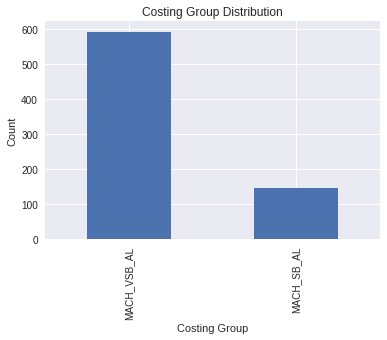

In [9]:
# Show the dirtributions in the costingGroup column
pd.value_counts(df_ref["costingGroup"]).plot.bar()
plt.title("Costing Group Distribution")
plt.xlabel("Costing Group")
plt.ylabel("Count")
plt.show()

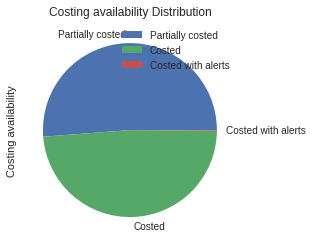

In [10]:
# Distributions in the Costing avaialbility column
pd.value_counts(df_ref["Costing availability"]).plot.pie()
plt.title("Costing availability Distribution")
plt.legend()
plt.show()

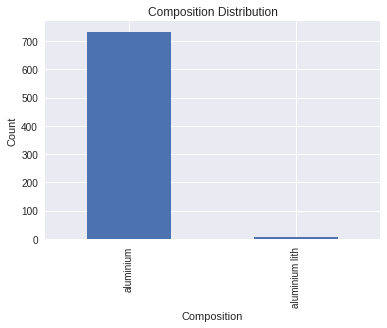

In [11]:
# Distributions n the composition column
pd.value_counts(df_ref["composition"]).plot.bar()
plt.title("Composition Distribution")
plt.xlabel("Composition")
plt.ylabel("Count")
plt.show()

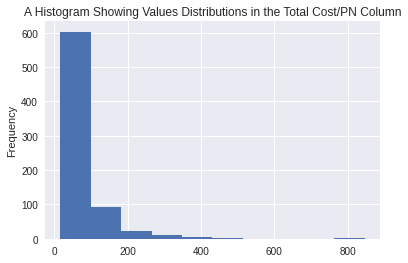

In [12]:
# Shows the distributions of Total Cost
df_ref["Total Cost/PN"].plot.hist()
plt.title("A Histogram Showing Values Distributions in the Total Cost/PN Column")
plt.show()

In [13]:
pd.DataFrame(df_ref.isnull().sum())

,0
partNumber,0
costingGroup,0
description,0
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,0


In [14]:
# Drop the Part Category for assembly operation and Nb of bonding point [Qty] columns that have a large number of missing values
# Drop the rows that have missing values
df_ref.drop(["Part Category for assembly operation", "Nb of bonding point [Qty]"], axis='columns', inplace=True)
df_ref.dropna(inplace=True)
pd.DataFrame(df_ref.isnull().sum())

,0
partNumber,0
costingGroup,0
description,0
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,0


In [15]:
# Correlation matrix of the numerical columns in the reference dataset
df_ref.corr()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,Material density,Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
Total Labor Cost/PN,1.000000,0.909834,0.968630,0.923448,0.822766,0.778162,0.825193,0.593444,0.011801,0.778588,0.823357,0.593177,0.778162,0.825193,0.596293,0.834812,0.778162,0.825193,0.596293,0.850475,0.955551,0.955551,-0.051103,0.182152,0.895078,0.587167,0.904940,0.192695,0.886539,0.746245,0.787357
Total Material Cost/PN,0.909834,1.000000,0.984416,0.991390,0.906734,0.603470,0.699677,0.694358,-0.065510,0.603854,0.698285,0.693130,0.603470,0.699677,0.696100,0.664874,0.603470,0.699677,0.696100,0.679538,0.846378,0.846378,-0.105971,0.028185,0.989426,0.660496,0.764087,0.156326,0.756416,0.650147,0.896898
Total Cost/PN,0.968630,0.984416,1.000000,0.985029,0.891667,0.691154,0.768698,0.667304,-0.034230,0.691564,0.767087,0.666455,0.691154,0.768698,0.669555,0.751932,0.691154,0.768698,0.669555,0.767352,0.911792,0.911792,-0.085117,0.094070,0.971831,0.644366,0.841065,0.175275,0.828673,0.705581,0.870771
Buy Weight,0.923448,0.991390,0.985029,1.000000,0.899159,0.614033,0.711400,0.700339,-0.070115,0.614437,0.709962,0.699267,0.614033,0.711400,0.702263,0.675815,0.614033,0.711400,0.702263,0.691489,0.856921,0.856921,-0.031445,0.047374,0.996531,0.655433,0.782340,0.170031,0.770981,0.648029,0.909621
Material Fly Weight [kg],0.822766,0.906734,0.891667,0.899159,1.000000,0.541463,0.654333,0.605545,0.002451,0.542466,0.653313,0.605393,0.541463,0.654333,0.606833,0.603369,0.541463,0.654333,0.606833,0.618125,0.807317,0.807317,-0.061914,0.036424,0.897773,0.683013,0.698361,0.126261,0.704356,0.550912,0.833751
Length,0.778162,0.603470,0.691154,0.614033,0.541463,1.000000,0.676238,0.354236,0.051210,0.999884,0.673826,0.355649,1.000000,0.676238,0.358756,0.986744,1.000000,0.676238,0.358756,0.953334,0.791480,0.791480,-0.108679,0.034101,0.560649,0.386844,0.827242,0.147121,0.780830,0.458321,0.484291
Width,0.825193,0.699677,0.768698,0.711400,0.654333,0.676238,1.000000,0.375714,0.008865,0.677510,0.999514,0.377792,0.676238,1.000000,0.381127,0.782791,0.676238,1.000000,0.381127,0.834715,0.859464,0.859464,-0.035375,0.171195,0.664750,0.465803,0.914995,0.082280,0.876735,0.521913,0.584744
Thickness,0.593444,0.694358,0.667304,0.700339,0.605545,0.354236,0.375714,1.000000,-0.149276,0.354866,0.375337,0.998184,0.354236,0.375714,0.998787,0.399703,0.354236,0.375714,0.998787,0.383876,0.543553,0.543553,-0.032433,0.115240,0.699924,0.472896,0.372963,0.221104,0.382760,0.484594,0.624610
Projected Area Ratio,0.011801,-0.065510,-0.034230,-0.070115,0.002451,0.051210,0.008865,-0.149276,1.000000,0.050002,0.005835,-0.152258,0.051210,0.008865,-0.151080,0.043150,0.051210,0.008865,-0.151080,0.011923,0.085932,0.085932,-0.023433,-0.012439,-0.076281,0.001736,-0.006042,0.018781,-0.002546,0.048852,0.001539
Projected Length,0.778588,0.603854,0.691564,0.614437,0.542466,0.999884,0.677510,0.354866,0.050002,1.000000,0.675469,0.356441,0.999884,0.677510,0.359395,0.986971,0.999884,0.677510,0.359395,0.953739,0.791911,0.791911,-0.108136,0.034768,0.561034,0.387680,0.827877,0.147884,0.781406,0.458172,0.484891


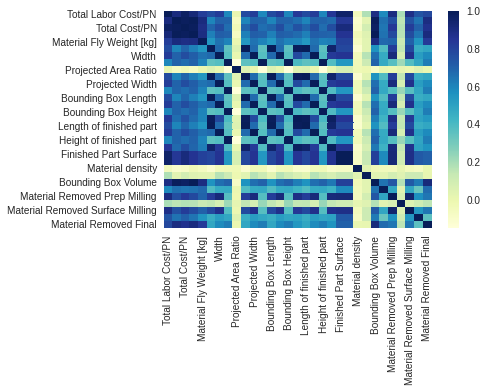

In [16]:
sns.heatmap(df_ref.corr(), cmap="YlGnBu")
plt.show()

In [17]:
df_ref = df_ref.select_dtypes(include=np.number)
X=df_ref.drop(["Total Cost/PN"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Total Labor Cost/PN,1.489160e+02
1,Total Material Cost/PN,1.097704e+02
2,Buy Weight,7.930560e+03
3,Material Fly Weight [kg],9.275730e+00
4,Length,4.152697e+12
5,Width,3.216857e+13
6,Thickness,7.365210e+02
7,Projected Area Ratio,1.480361e+00
8,Projected Length,1.421763e+04
9,Projected Width,3.044477e+03


We start off by dropping the Finished Part Surface and DPT Wet Surface Area columns because of the high variance inflation factor value and repeat the analysis.

Next drop all the coluns with VIF value inf and repeat the analysis.

In [18]:
drop_columns = ["Total Cost/PN"]
while vif.vif_Factor.isin([np.inf, -np.inf]).sum() != 0:
  X=df_ref.drop(drop_columns, axis=1)
  vif = pd.DataFrame()
  vif["features"] = X.columns
  vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  for index in range(len(vif)):
    if vif.vif_Factor[index] > 1000:
      drop_columns.append(vif.features[index])
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
0,Total Labor Cost/PN,493.061924
1,Total Material Cost/PN,37.239196
2,Material Fly Weight [kg],8.098297
3,Thickness,9.078166
4,Projected Area Ratio,23.338613
5,Max Diagonal Part,103.195061
6,Projected Perimeter,141.308444
7,Material density,106.681959
8,Nb of holes for DPT treat,3.208057
9,Finished part Volume,2.305942


In [19]:
df_ref = df_ref.select_dtypes(include=np.number)
X=df_ref.drop(drop_columns + ["Total Labor Cost/PN", "Projected Perimeter"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,Total Material Cost/PN,37.238429
1,Material Fly Weight [kg],8.097105
2,Thickness,9.005383
3,Projected Area Ratio,22.732220
4,Max Diagonal Part,19.691780
5,Material density,32.938610
6,Nb of holes for DPT treat,1.478633
7,Finished part Volume,2.293109
8,Material Removed Prep Milling,27.726164
9,Material Removed Surface Milling,17.245644


In [20]:
df_ref = df_ref.select_dtypes(include=np.number)
X=df_ref.drop(drop_columns + ["Total Labor Cost/PN", "Projected Perimeter", "Total Material Cost/PN", "Material density", "Material Removed Prep Milling"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,Material Fly Weight [kg],6.344331
1,Thickness,5.747548
2,Projected Area Ratio,5.196618
3,Max Diagonal Part,12.824519
4,Nb of holes for DPT treat,1.432754
5,Finished part Volume,2.290718
6,Material Removed Surface Milling,8.653733
7,Material Removed Pockets,2.024139
8,Material Removed Final,4.966489


In [21]:
df_ref = df_ref.select_dtypes(include=np.number)
X=df_ref.drop(drop_columns + ["Total Labor Cost/PN", "Max Diagonal Part", "Projected Perimeter", "Total Material Cost/PN", "Material density", "Material Removed Prep Milling"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,Material Fly Weight [kg],6.339043
1,Thickness,5.155085
2,Projected Area Ratio,3.817162
3,Nb of holes for DPT treat,1.423961
4,Finished part Volume,2.285804
5,Material Removed Surface Milling,3.800280
6,Material Removed Pockets,2.020918
7,Material Removed Final,4.873980


In [22]:
# Define the list of predictors based on their correlation values with the dependent variable (Total Cost/PN)
predictors = vif.features
target = "Total Cost/PN"
X = df_ref[predictors].values # Train Features
y = df_ref[target].values # Train Labels

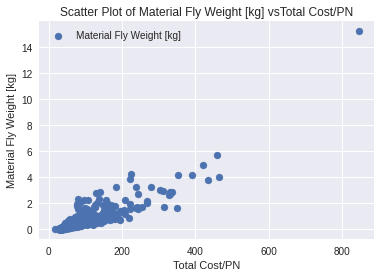

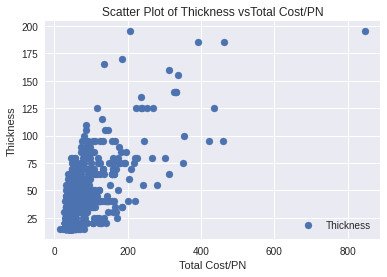

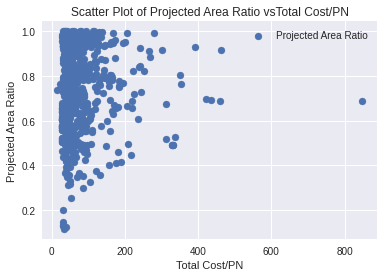

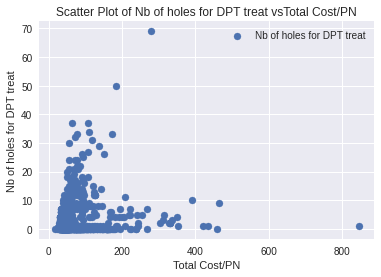

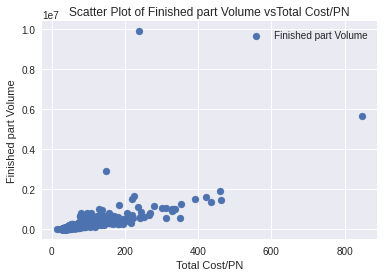

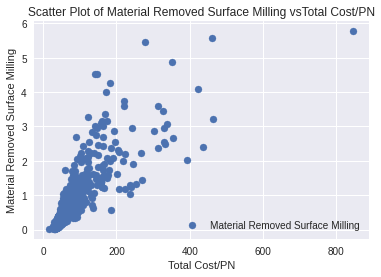

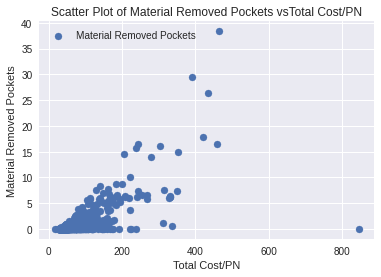

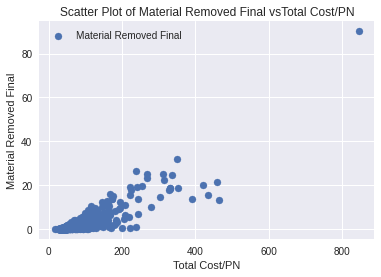

In [23]:
for predictor in predictors:
  plt.scatter(df_ref[target], df_ref[predictor], label=predictor)
  plt.xlabel(target)
  plt.ylabel(predictor)
  plt.title(f"Scatter Plot of {predictor} vs{target}")
  plt.legend()
  plt.show()

In [24]:
# Split the train(reference) dataset into 80% train, 20% validatin and apply random state and shuffle
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [25]:
print(X_train.shape)
print(y_train.shape)

(583, 8)
(583,)


In [26]:
# Initialize the Linear Regression Model from sklearn
model = LinearRegression()
history = model.fit(X_train, y_train) # Train the model
print("Y-Intercept: {:.4f}, Coefficients: {}".format(history.intercept_, history.coef_)) # Gets the cooefficients for the predictors and also the y-intercept

Y-Intercept: 42.4117, Coefficients: [ 1.09318845e+01  1.11021310e-01 -1.53579153e+01  1.46542531e-01
 -2.10021643e-07  1.93840959e+01  7.13891030e+00  5.77003094e+00]


In [27]:
# Visualize the performance of the model based on the validation set
print("Validation Set")
print("Model's Accuracy: {:.2f}%".format(model.score(X_val, y_val)*100))

# Make a prediction on the validation dataset and compare with the validation labels
y_pred = model.predict(X_val)
print("Mean squared error: %.4f" % mean_squared_error(y_val, y_pred))

Validation Set
Model's Accuracy: 98.04%
Mean squared error: 102.8201


# Model Testing

In [28]:
# Get the sheet names in the test excel file
test_excel.sheet_names

['Costing Detail', 'Tech. Drivers']

In [29]:
# Load the individual excel sheets as a pandas DataFrame
test_costingDetail = test_excel.parse("Costing Detail")
test_techDrivers = test_excel.parse("Tech. Drivers")

In [30]:
# Converting the part number to lower case to resemble the techDrivers one
test_costingDetail.partNumber = test_costingDetail.partNumber.str.lower()

# Visualize the test Costing Detail dataframe
test_costingDetail

,partNumber,costingGroup,description,Costing availability,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,form,composition,Buy Weight
0,x00001,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,49.190678,30.684678,79.875356,plate,aluminium,9.518668
1,x00002,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,49.314152,30.684678,79.998830,plate,aluminium,9.518668
2,x00003,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,46.700460,28.434092,75.134552,plate,aluminium,8.661272
3,x00004,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,46.706550,28.434092,75.140642,plate,aluminium,8.661272
4,x00005,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,44.761978,26.504926,71.266904,plate,aluminium,7.929475
...,...,...,...,...,...,...,...,...,...,...
4662,x04663,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,30.780089,7.774107,38.554196,plate,aluminium,1.812352
4663,x04664,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.932431,9.464103,37.396534,plate,aluminium,2.429935
4664,x04665,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.943553,9.464103,37.407655,plate,aluminium,2.429935
4665,x04666,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.842944,9.464103,37.307046,plate,aluminium,2.429935


In [31]:
# Visualize the test Tech Drivers dataframe
test_techDrivers

,partNumber,costingGroup,Part Category for assembly operation,Designation,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,form,composition,Material density,Material Cluster,Buy Weight,Nb of bonding point [Qty],Surface protection code (DPT),Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
0,x00001,MACH_VSB_AL,NaN,FRAME SPLICE-LWR,0.7648,365.3418,155.0842,60.0,0.7668,345.3412,135.0848,50.8400,345.3418,135.0842,50.840,374.2905,345.3418,135.0842,50.840,948.0833,54878.0864,109756.1728,plate,aluminium,2.8,SOFT Metal,9.518668,7,AA023,0.0,2.371697e+06,254142.4762,0.793222,1.0,0.659961,1.709929,2.617473
1,x00002,MACH_VSB_AL,NaN,FRAME SPLICE-LWR,0.7648,365.3418,155.0842,60.0,0.7668,345.3412,135.0848,50.8400,345.3418,135.0842,50.840,374.2905,345.3418,135.0842,50.840,948.6690,54878.0864,109756.1728,plate,aluminium,2.8,SOFT Metal,9.518668,7,AA023,0.0,2.371697e+06,254215.0162,0.793222,1.0,0.659961,1.709929,2.617473
2,x00003,MACH_VSB_AL,NaN,FRAME SPLICE-LWR,0.7215,337.9157,152.5682,60.0,0.7774,317.9152,132.5687,51.3400,317.9157,132.5682,51.340,348.2536,317.9157,132.5682,51.340,887.2548,50480.8192,100961.6384,plate,aluminium,2.8,SOFT Metal,8.661272,0,AA023,0.0,2.163751e+06,253987.0521,0.721773,1.0,0.528338,1.552693,2.435510
3,x00004,MACH_VSB_AL,NaN,FRAME SPLICE-LWR,0.7215,337.9157,152.5682,60.0,0.7774,317.9152,132.5687,51.3400,317.9157,132.5682,51.340,348.2536,317.9157,132.5682,51.340,887.8406,50480.8191,100961.6381,plate,aluminium,2.8,SOFT Metal,8.661272,0,AA023,0.0,2.163751e+06,253987.0586,0.721773,1.0,0.528338,1.552693,2.435619
4,x00005,MACH_VSB_AL,NaN,FRAME SPLICE-LWR,0.6705,310.4920,152.0144,60.0,0.7905,290.4926,132.0148,51.3400,290.4920,132.0144,51.340,323.1860,290.4920,132.0144,51.340,835.5980,47078.4608,94156.9216,plate,aluminium,2.8,SOFT Metal,7.929475,0,AA023,0.0,1.968844e+06,236023.4183,0.660790,1.0,0.483698,1.444077,2.243045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,x04663,MACH_VSB_AL,NaN,DOOR SENSOR BRACKET,0.1364,96.0000,89.8984,75.0,1.0000,76.0000,69.8984,66.0000,76.0000,69.8984,66.000,122.5471,76.0000,69.8984,66.000,290.0000,13523.6090,27047.2180,plate,aluminium,2.8,SOFT Metal,1.812352,2,AA023,0.0,3.506104e+05,47677.7916,0.120823,1.0,0.096659,0.344992,0.500317
4663,x04664,MACH_VSB_AL,NaN,DOOR SENSOR BRACKET,0.1534,137.4460,90.2000,70.0,0.8756,117.4456,70.2000,57.9393,117.4460,70.2000,57.983,148.6056,117.4460,70.2000,57.983,371.3137,16386.7851,32773.5702,plate,aluminium,2.8,SOFT Metal,2.429935,2,AA011,0.0,4.780527e+05,57093.6740,0.173567,1.0,0.243584,0.305992,0.712681
4664,x04665,MACH_VSB_AL,NaN,DOOR SENSOR BRACKET,0.1534,137.4460,90.2000,70.0,0.8753,117.4456,70.2000,57.9393,117.4460,70.2000,57.983,148.6056,117.4460,70.2000,57.983,372.4853,16386.7851,32773.5702,plate,aluminium,2.8,SOFT Metal,2.429935,2,AA011,0.0,4.780527e+05,57103.5330,0.173567,1.0,0.243584,0.305992,0.712209
4665,x04666,MACH_VSB_AL,NaN,DOOR SENSOR BRACKET,0.1534,137.4460,90.2000,70.0,0.8756,117.4456,70.2000,57.9393,117.4460,70.2000,57.983,148.6056,117.4460,70.2000,57.983,371.3137,16386.7851,32773.5702,plate,aluminium,2.8,SOFT Metal,2.429935,2,AA023,0.0,4.780527e+05,57093.6740,0.173567,1.0,0.243584,0.305992,0.712681


In [32]:
# Merge the two dataframe using partNumber, costingGroup, Buy Weight, form and composition as the common columns
df_test = pd.merge(test_costingDetail, test_techDrivers, on=["partNumber", "costingGroup", "Buy Weight", "form", "composition"])

# Visualize the merged test dataset
df_test

,partNumber,costingGroup,description,Costing availability,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,form,composition,Buy Weight,Part Category for assembly operation,Designation,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,Material density,Material Cluster,Nb of bonding point [Qty],Surface protection code (DPT),Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
0,x00001,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,49.190678,30.684678,79.875356,plate,aluminium,9.518668,NaN,FRAME SPLICE-LWR,0.7648,365.3418,155.0842,60.0,0.7668,345.3412,135.0848,50.8400,345.3418,135.0842,50.840,374.2905,345.3418,135.0842,50.840,948.0833,54878.0864,109756.1728,2.8,SOFT Metal,7,AA023,0.0,2.371697e+06,254142.4762,0.793222,1.0,0.659961,1.709929,2.617473
1,x00002,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,49.314152,30.684678,79.998830,plate,aluminium,9.518668,NaN,FRAME SPLICE-LWR,0.7648,365.3418,155.0842,60.0,0.7668,345.3412,135.0848,50.8400,345.3418,135.0842,50.840,374.2905,345.3418,135.0842,50.840,948.6690,54878.0864,109756.1728,2.8,SOFT Metal,7,AA023,0.0,2.371697e+06,254215.0162,0.793222,1.0,0.659961,1.709929,2.617473
2,x00003,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,46.700460,28.434092,75.134552,plate,aluminium,8.661272,NaN,FRAME SPLICE-LWR,0.7215,337.9157,152.5682,60.0,0.7774,317.9152,132.5687,51.3400,317.9157,132.5682,51.340,348.2536,317.9157,132.5682,51.340,887.2548,50480.8192,100961.6384,2.8,SOFT Metal,0,AA023,0.0,2.163751e+06,253987.0521,0.721773,1.0,0.528338,1.552693,2.435510
3,x00004,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,46.706550,28.434092,75.140642,plate,aluminium,8.661272,NaN,FRAME SPLICE-LWR,0.7215,337.9157,152.5682,60.0,0.7774,317.9152,132.5687,51.3400,317.9157,132.5682,51.340,348.2536,317.9157,132.5682,51.340,887.8406,50480.8191,100961.6381,2.8,SOFT Metal,0,AA023,0.0,2.163751e+06,253987.0586,0.721773,1.0,0.528338,1.552693,2.435619
4,x00005,MACH_VSB_AL,FRAME SPLICE-LWR,Costed,44.761978,26.504926,71.266904,plate,aluminium,7.929475,NaN,FRAME SPLICE-LWR,0.6705,310.4920,152.0144,60.0,0.7905,290.4926,132.0148,51.3400,290.4920,132.0144,51.340,323.1860,290.4920,132.0144,51.340,835.5980,47078.4608,94156.9216,2.8,SOFT Metal,0,AA023,0.0,1.968844e+06,236023.4183,0.660790,1.0,0.483698,1.444077,2.243045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,x04663,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,30.780089,7.774107,38.554196,plate,aluminium,1.812352,NaN,DOOR SENSOR BRACKET,0.1364,96.0000,89.8984,75.0,1.0000,76.0000,69.8984,66.0000,76.0000,69.8984,66.000,122.5471,76.0000,69.8984,66.000,290.0000,13523.6090,27047.2180,2.8,SOFT Metal,2,AA023,0.0,3.506104e+05,47677.7916,0.120823,1.0,0.096659,0.344992,0.500317
4663,x04664,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.932431,9.464103,37.396534,plate,aluminium,2.429935,NaN,DOOR SENSOR BRACKET,0.1534,137.4460,90.2000,70.0,0.8756,117.4456,70.2000,57.9393,117.4460,70.2000,57.983,148.6056,117.4460,70.2000,57.983,371.3137,16386.7851,32773.5702,2.8,SOFT Metal,2,AA011,0.0,4.780527e+05,57093.6740,0.173567,1.0,0.243584,0.305992,0.712681
4664,x04665,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.943553,9.464103,37.407655,plate,aluminium,2.429935,NaN,DOOR SENSOR BRACKET,0.1534,137.4460,90.2000,70.0,0.8753,117.4456,70.2000,57.9393,117.4460,70.2000,57.983,148.6056,117.4460,70.2000,57.983,372.4853,16386.7851,32773.5702,2.8,SOFT Metal,2,AA011,0.0,4.780527e+05,57103.5330,0.173567,1.0,0.243584,0.305992,0.712209
4665,x04666,MACH_VSB_AL,DOOR SENSOR BRACKET,Costed,27.842944,9.464103

In [33]:
# Check the number of missing values in each column
pd.DataFrame(df_test.isnull().sum())

,0
partNumber,0
costingGroup,0
description,1
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,2


In [34]:
# Drop the Part Category for assembly operation column that has numerous missing values and drop the rows that have missing values
df_test.drop("Part Category for assembly operation", axis="columns", inplace=True)
df_test.dropna(inplace=True)
pd.DataFrame(df_test.isnull().sum())

,0
partNumber,0
costingGroup,0
description,0
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,0


In [35]:
# Correlation matrix of the test dataset numerica columns
df_test.corr()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight,Material Fly Weight [kg],Length,Width,Thickness,Projected Area Ratio,Projected Length,Projected Width,Projected Height,Bounding Box Length,Bounding Box Width,Bounding Box Height,Max Diagonal Part,Length of finished part,Width of finished part,Height of finished part,Projected Perimeter,Finished Part Surface,DPT Wet Surface Area,Material density,Nb of bonding point [Qty],Nb of holes for DPT treat,Bounding Box Volume,Finished part Volume,Material Removed Prep Milling,Machining In Opposite Direction,Material Removed Surface Milling,Material Removed Pockets,Material Removed Final
Total Labor Cost/PN,1.000000,0.870909,0.947516,0.940391,0.832262,0.770442,0.796850,0.519246,-0.141383,0.770451,0.796833,0.516601,0.770442,0.796850,0.516545,0.820688,0.770442,0.796850,0.516545,0.837514,0.954242,0.954242,-0.210182,0.247502,0.282663,0.924330,0.827614,0.907215,0.302308,0.890977,0.866148,0.800985
Total Material Cost/PN,0.870909,1.000000,0.982319,0.925339,0.794177,0.602860,0.696165,0.531962,-0.156519,0.602868,0.696135,0.530431,0.602860,0.696165,0.530405,0.656590,0.602860,0.696165,0.530405,0.675585,0.848892,0.848892,-0.418091,0.073957,0.309906,0.930195,0.793790,0.781006,0.236297,0.774942,0.809474,0.839815
Total Cost/PN,0.947516,0.982319,1.000000,0.960217,0.833699,0.685688,0.756447,0.543873,-0.155683,0.685696,0.756421,0.541869,0.685688,0.756447,0.541831,0.739783,0.685688,0.756447,0.541831,0.758550,0.915762,0.915762,-0.352056,0.142398,0.309288,0.957258,0.831676,0.853684,0.268886,0.843553,0.856559,0.851474
Buy Weight,0.940391,0.925339,0.960217,1.000000,0.865621,0.663097,0.766006,0.598731,-0.177523,0.663111,0.765994,0.597186,0.663097,0.766006,0.597129,0.723270,0.663097,0.766006,0.597129,0.742699,0.932390,0.932390,-0.178991,0.090938,0.259339,0.997436,0.861761,0.856486,0.261424,0.846789,0.890053,0.858358
Material Fly Weight [kg],0.832262,0.794177,0.833699,0.865621,1.000000,0.576354,0.707203,0.535814,-0.041209,0.576372,0.707212,0.535869,0.576354,0.707203,0.535878,0.638964,0.576354,0.707203,0.535878,0.649951,0.884310,0.884310,-0.144242,0.034309,0.137318,0.862372,0.995017,0.751604,0.194953,0.720538,0.811411,0.771577
Length,0.770442,0.602860,0.685688,0.663097,0.576354,1.000000,0.633270,0.258327,-0.153748,1.000000,0.633240,0.255699,1.000000,0.633270,0.255542,0.989424,1.000000,0.633270,0.255542,0.963331,0.776277,0.776277,-0.255647,0.011524,0.223516,0.619145,0.579008,0.853543,0.251689,0.816922,0.513500,0.609485
Width,0.796850,0.696165,0.756447,0.766006,0.707203,0.633270,1.000000,0.425446,-0.193091,0.633295,0.999991,0.424975,0.633270,1.000000,0.424774,0.731359,0.633270,1.000000,0.424774,0.796201,0.832672,0.832672,-0.193174,0.102309,0.220182,0.738627,0.707319,0.881071,0.319411,0.835669,0.636997,0.650178
Thickness,0.519246,0.531962,0.543873,0.598731,0.535814,0.258327,0.425446,1.000000,-0.177267,0.258328,0.425421,0.998505,0.258327,0.425446,0.998510,0.332562,0.258327,0.425446,0.998510,0.331395,0.499463,0.499463,-0.062513,0.127488,0.192169,0.590847,0.530640,0.341195,0.332187,0.345559,0.484908,0.615637
Projected Area Ratio,-0.141383,-0.156519,-0.155683,-0.177523,-0.041209,-0.153748,-0.193091,-0.177267,1.000000,-0.153757,-0.193141,-0.174728,-0.153748,-0.193091,-0.174544,-0.170535,-0.153748,-0.193091,-0.174544,-0.200401,-0.094995,-0.094995,0.034154,-0.047246,-0.132765,-0.169717,-0.040233,-0.182113,-0.211015,-0.187129,-0.097052,-0.050129
Projected Length,0.770451,0.602868,0.685696,0.663111,0.576372,1.000000,0.633295,0.258328,-0.153757,1.000000,0.633266,0.255700,1.000000,0.633295,0.255544,0.989428,1.000000,0.633295,0.255544,0.963340,0.776287,0.776287,-0.255631,0.011528,0.223506,0.619160,0.579026,0.853553,0.251669,0.816929,0.513504,0.609503


In [36]:
# Define the features and labels dataset
X_test = df_test[predictors].values
y_test = df_test[target].values

In [37]:
# Make predictions on the test set and compare the results with the expected labels
print("Test Set")
print("Model's Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Test Set
Model's Accuracy: 89.08%
Mean squared error: 447.82


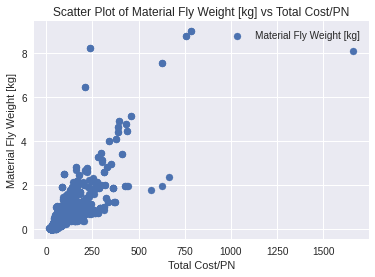

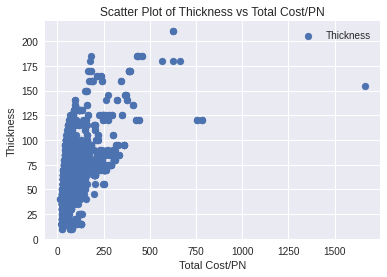

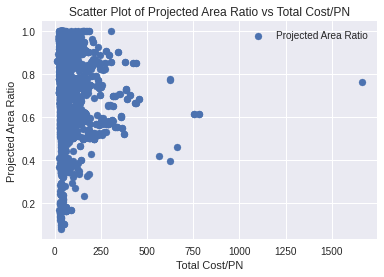

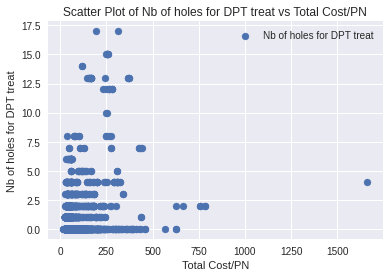

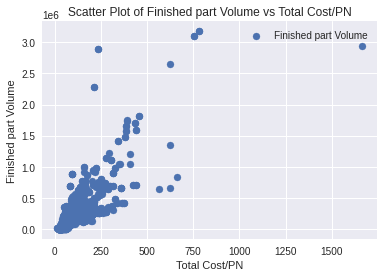

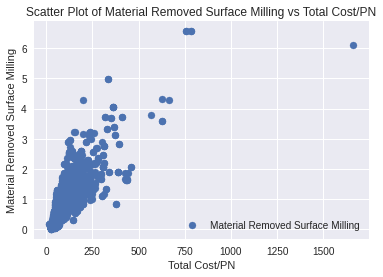

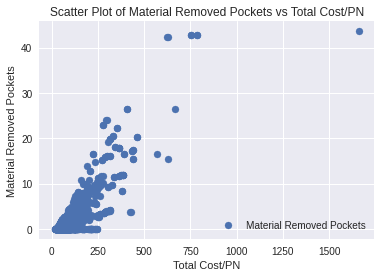

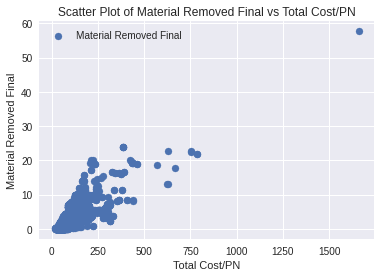

In [38]:
# Plot scatter plots of the test dataset predictors vs the dependent variable
for predictor in predictors:
  plt.scatter(df_test[target], df_test[predictor], label=predictor)
  plt.xlabel(target)
  plt.ylabel(predictor)
  plt.title(f"Scatter Plot of {predictor} vs {target}")
  plt.legend()
  plt.show()

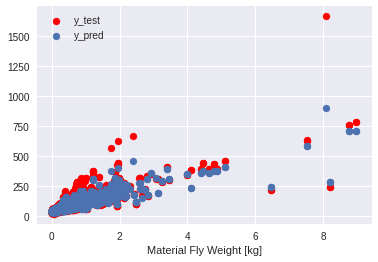

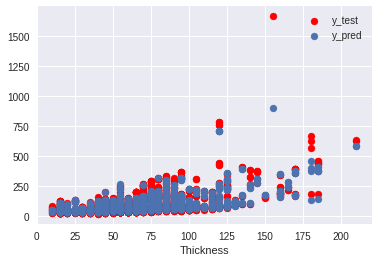

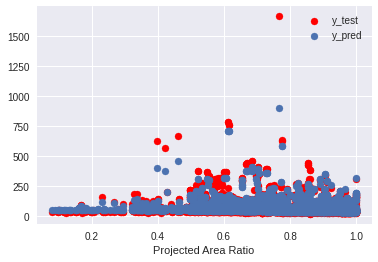

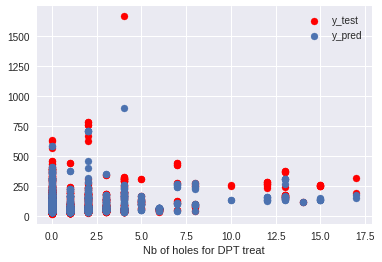

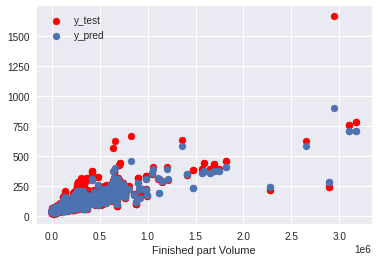

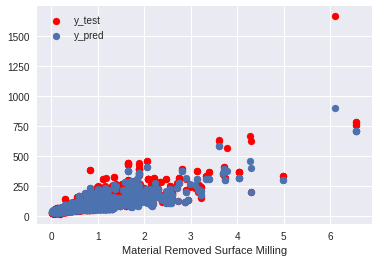

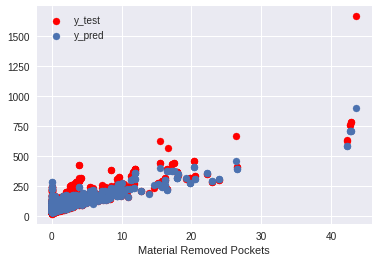

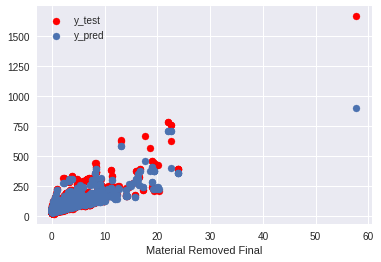

In [39]:
# A scatter plot of the test values and a line plot of the predicted values
for idx in range(len(predictors)):
  y_pred = model.predict(X_test)
  plt.scatter(df_test[predictors[idx]], y_test, color ='r', label="y_test")
  plt.scatter(df_test[predictors[idx]], y_pred, label="y_pred")
  plt.xlabel(predictors[idx])
  plt.legend()
  plt.show()

$Y_i=f(X_i, \beta)+e_i$

$Y_i$	=	dependent variable

$f$	=	function

$X_i$	=	independent variable

$\beta$	=	unknown parameters

$e_i$	=	error terms